In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.image as  img

In [2]:
data_set_name_kaggle=""

train_data_set_name="/river.jpg"
test_data_set_name="/river.jpg"

import os
import sys


def setup_environment(): # for less manual work when move it from local to colab and kaggle
    """
    environment detection that checks for kaggle, colab and colab at the end
    """
    
    env_info = {
        'environment': 'unknown',
        'is_colab': False,
        'is_kaggle': False,
        'is_local': False,
        'base_path': '',
        'data_path': '',
        'notebook_path': ''
    }
    
    # check for kaggle first  
    kaggle_indicators = [
        'KAGGLE_KERNEL_RUN_TYPE' in os.environ,
        'KAGGLE_URL_BASE' in os.environ,
        '/kaggle/' in os.getcwd(),
        any('kaggle' in path.lower() for path in sys.path),
        os.path.exists('/kaggle')
    ]
    
    if all(kaggle_indicators):
        env_info['environment'] = 'kaggle'
        env_info['is_kaggle'] = True
        env_info['base_path'] = '/kaggle/working'
        env_info['data_path'] = f'/kaggle/input'
        env_info['notebook_path'] = '/kaggle/working'
        print(" Environment: Kaggle Notebook")
    
    # then Colab
    elif 'google.colab' in sys.modules:
        env_info['environment'] = 'google_colab'
        env_info['is_colab'] = True
        env_info['base_path'] = '/content'
        env_info['data_path'] = f'/content/drive/MyDrive/Colab Notebooks/data_sets'
        env_info['notebook_path'] = '/content/drive/MyDrive/Colab Notebooks'
        print(" Environment: Google Colab")
        from google.colab import drive
        drive.mount('/content/drive')
        
    # local system at last
    else:
        env_info['environment'] = 'local_system'
        env_info['is_local'] = True
        env_info['base_path'] = os.getcwd()
        env_info['data_path'] = os.path.join(os.getcwd(), 'data_sets')
        env_info['notebook_path'] = os.getcwd()
        print(" Environment: Local System")
    

    
    return env_info



environment = setup_environment()
print(f"Base path: {environment['base_path']}","\n")
print(f"Data path: {environment['data_path']}")

train_csv_path = environment["data_path"]+train_data_set_name
test_csv_path = environment["data_path"]+test_data_set_name

df_train=img.imread(train_csv_path) # this time it's a picture
df_test=img.imread(test_csv_path)
# df_train=pd.DataFrame(df_train)
# df_test=pd.DataFrame(df_test)

# if df_train.equals(df_test) :
#     print('you only have one dataset. data_test is same as data_train')
#     data_train, data_test = train_test_split(df_train,test_size=0.2,random_state=42,shuffle=True) 

# else:
#     data_train = df_train
#     data_test = df_test


 Environment: Local System
Base path: /home/aerf123/my_projects/python/Data_analysis_and_science_and_ml/ml_class_project/Colab Notebooks 

Data path: /home/aerf123/my_projects/python/Data_analysis_and_science_and_ml/ml_class_project/Colab Notebooks/data_sets


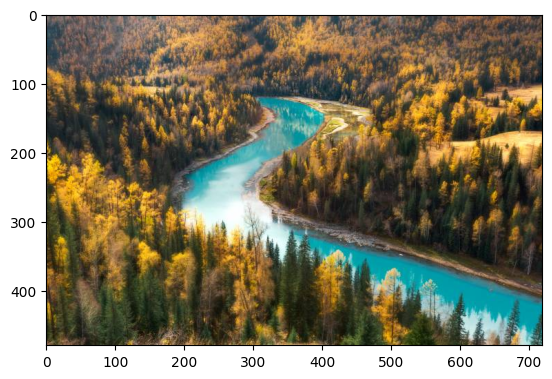

In [3]:
if df_train.max() <= 1:
    df_train = (img * 255).astype(np.uint8)

plt.imshow(df_train)

In [4]:
data_image=pd.DataFrame(df_train.reshape(-1,3))
data_image

,0,1,2
0,95,75,76
1,106,90,90
2,112,102,103
3,114,112,113
4,110,114,115
...,...,...,...
345595,55,85,77
345596,58,90,85
345597,49,89,81
345598,105,147,143


In [5]:
X=data_image.iloc[:,:]
K=range(2,6)
dominant_colors=[]
counts=[]
labels=[]
centers_colors=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans=kmeans.fit(X)
    dominant_col=kmeans.cluster_centers_.astype(int)
    dominant_colors.append(dominant_col)
    centers_colors.append(kmeans.cluster_centers_.astype(np.int32))
    labels.append(kmeans.labels_)
    counts.append(np.bincount(kmeans.labels_))

In [6]:
percentages=[]

In [7]:
for k,(i,j) in enumerate(zip(counts,labels)):
    percentages=(i/len(j))
    print(3*"\n",f"colors below made this ratio of all colors in {k+2} center (all color labeled as nearest center): ",
          percentages,"\n\n",centers_colors[k])




 colors below made this ratio of all colors in 2 center (all color labeled as nearest center):  [0.67045139 0.32954861] 

 [[ 68  68  50]
 [172 149 102]]



 colors below made this ratio of all colors in 3 center (all color labeled as nearest center):  [0.32010127 0.11130208 0.56859664] 

 [[165 127  71]
 [112 183 182]
 [ 65  59  42]]



 colors below made this ratio of all colors in 4 center (all color labeled as nearest center):  [0.32404514 0.06797743 0.06467303 0.5433044 ] 

 [[158 121  69]
 [205 208 182]
 [ 42 153 160]
 [ 63  58  41]]



 colors below made this ratio of all colors in 5 center (all color labeled as nearest center):  [0.18249132 0.05368634 0.30925926 0.39150463 0.06305845] 

 [[188 143  74]
 [202 216 200]
 [111  90  61]
 [ 51  49  35]
 [ 42 154 161]]


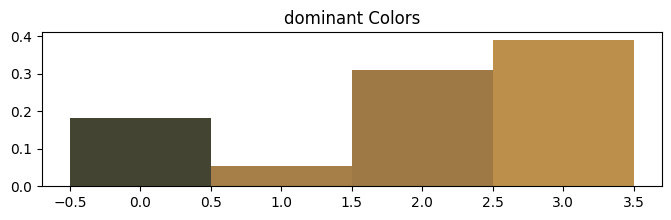

In [8]:

plt.figure(figsize=(8, 2))
for i,color in enumerate(dominant_colors):
    plt.bar(i, percentages[i], color=color/255, width=1)
plt.title("dominant Colors")
plt.show()

In [9]:
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42)
kmeans=kmeans.fit(X)

Text(0.5, 1.0, 'original image')

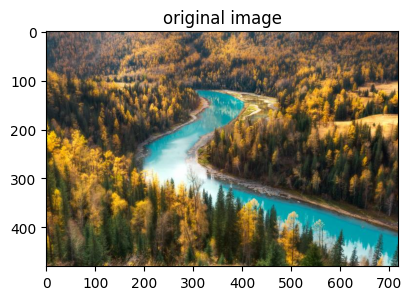

In [10]:
colors=np.round(kmeans.cluster_centers_).astype(np.uint8)
labels=kmeans.labels_
segmented_pixels=colors[labels]
segmented_img=segmented_pixels.reshape(df_train.shape)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(df_train)
plt.title("original image")


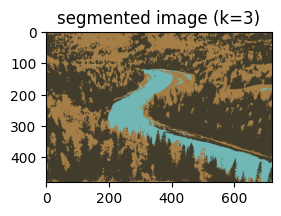

In [11]:
plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title(f"segmented image (k={n_clusters})")
plt.show()